In [1]:
import numpy as np
from sklearn.datasets import make_classification
class LayerDense:
    def __init__(self, n_features, n_neurons):
        self.weights = 0.1 * np.random.randn(n_neurons, n_features)
        self.bias = np.zeros((n_neurons,1))
        
    def forward(self, inputs):
        self.output = np.dot(self.weights, inputs) +self.bias

class Activation_ReLU:
    def forward(self, inputs):
        self.output= np.maximum(0, inputs)

class Activation_Softmax:
    def forward(self, inputs):
        exp_values= np.exp(inputs - np.max(inputs, axis=0, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=0, keepdims=True)
class Activation_sigmoid:
    def forward(self, inputs):
        self.output= 1/(1+np.exp(-inputs))
    

In [2]:
import pandas as pd
data = pd.read_csv('MedicalAppointment.csv')

In [3]:
data['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [4]:
data = data.drop(index=99832)


In [5]:
data[data['No-show']=='No']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
x = data[['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']].to_numpy()

In [7]:
y = data['No-show'].to_numpy()

In [8]:
y= np.where(y=='No', 1,0)

In [9]:
y.shape

(110526,)

In [10]:
def cost(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1-1e-7)

    loss = -y*np.log(y_hat) -(1-y)*np.log(1-y_hat)
    if (loss.shape[1] !=1):
        summed =1/len(y)* np.sum(loss, axis=1, keepdims=1)
    else:
        summed =1/len(y)*loss
    return summed



In [11]:
np.array([1,2])*np.array([2,4])

array([2, 8])

In [12]:
m = len(data)

In [13]:
x = x.reshape((7,110526))

In [14]:
layer1 = LayerDense(7, 256)
layer2 = LayerDense(256,1)

activation1 = Activation_sigmoid()
activation2 = Activation_sigmoid()
y = y.reshape(1,110526)
lr = 0.01
n_iters = 120

In [15]:
def backward_layer2(y_hat, y, m, a1, w2):
    a3 = y_hat
    dc_dz2 = (y_hat - y)/m
    dz2_dw2 =   a1
   
    dw = dc_dz2@dz2_dw2.T
    db = np.sum(dc_dz2)
    dz2_da1 = w2

    dc_da1 = w2.T@dc_dz2

    return dw, db, dc_da1

In [16]:
m= len(data)

In [17]:
def backward_layer1(dc_da1, a1, w1, x):
    dc_dz1= dc_da1 * a1*(1-a1)
    dz1_dw1 = x
    dc_dw1 = dc_dz1@dz1_dw1.T
    dc_db1 = np.sum(dc_dz1, axis=1, keepdims=1)

    return dc_dw1, dc_db1

In [18]:
import os
import psutil
p= psutil.Process(os.getpid())


In [19]:

for _ in range(n_iters):
    layer1.forward(x)
    activation1.forward(layer1.output)
    layer2.forward(activation1.output)
    activation2.forward(layer2.output)
    loss = cost(activation2.output, y)
    dw2, db2, dc_da1 = backward_layer2(activation2.output, y, x.shape[1], activation1.output, layer2.weights)
    dw1,db1  = backward_layer1(dc_da1, activation1.output, layer1.weights, x)
    layer2.weights -= lr*dw2
    layer1.weights -= lr*dw1
    layer2.bias -= lr*db2
    layer1.bias -= lr*db1
print("Memory usage",p.memory_info().rss/1e9,"GB")

KeyboardInterrupt: 

In [ ]:
y_pred = activation2.output

In [ ]:
y_pred = np.where(y_pred>0.6, 1,0)

In [ ]:
y_pred = np.where(y_pred>0.5,1, 0)

In [ ]:
y_pred

array([[1, 1, 1, ..., 1, 1, 1]])

In [ ]:
y

array([[1, 1, 1, ..., 1, 1, 1]])

In [ ]:
y_pred, y =y_pred.reshape((m, 1)), y.reshape((m,1))

In [ ]:
from sklearn.metrics import accuracy_score , f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
accuracy_score(y, y_pred)

0.7980656135208005

In [ ]:
f1_score(y, y_pred)

0.8876935385668208

In [ ]:
roc_auc_score(y, y_pred)

np.float64(0.5)

In [ ]:
cm = confusion_matrix(y, y_pred)

In [ ]:
cm_display = ConfusionMatrixDisplay(cm, display_labels=['No', 'Yes'])

In [ ]:
import matplotlib.pyplot as plt

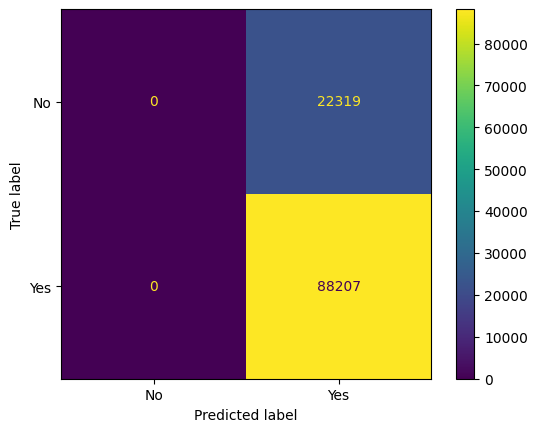

In [ ]:
cm_display.plot()
plt.show()